In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pickle

%matplotlib inline

In [5]:
!pwd

/Users/elmi/Projects/CloudWine/train/notebooks


In [7]:
df = pd.read_csv('/Users/elmi/Projects/CloudWine/train/data/raw/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


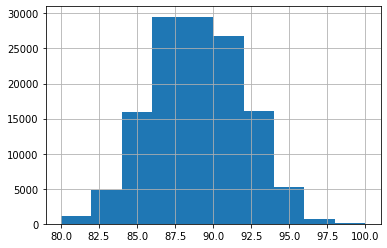

In [8]:
df['points'].hist()

In [18]:
df[df['points'] >90].sample(2000).to_csv('./data/sample_1000')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
61716,61716,Germany,Delicate floral notes mingle with smoke and st...,Sekt Brut,93,38.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Peter Lauer NV Sekt Brut Riesling (Mosel),Riesling,Peter Lauer
110329,110329,US,This is the second vintage of sparkling wine p...,Brut,91,40.0,California,Sta. Rita Hills,Central Coast,Matt Kettmann,@mattkettmann,Fesstivity 2014 Brut Rosé (Sta. Rita Hills),Rosé,Fesstivity
105558,105558,France,92–94. Barrel sample. There's great concentrat...,Barrel Sample,93,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Langoa Barton 2012 Barrel Sample (Sai...,Bordeaux-style Red Blend,Château Langoa Barton
71908,71908,France,A Champagne that is very much wine. The struct...,Cuvée Victor Mandois Vieilles Vignes Brut,93,100.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Mandois 2000 Cuvée Victor Mandois Vieilles Vig...,Champagne Blend,Mandois
15246,15246,Italy,"Exotic spice, French oak, mature berry, mentho...",Monfalletto,93,48.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Cordero di Montezemolo 2012 Monfalletto (Barolo),Nebbiolo,Cordero di Montezemolo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112453,112453,US,"This is a very powerful Chardonnay, brimming i...",Broken Road,93,42.0,California,Alexander Valley,Sonoma,NaN,NaN,Stonestreet 2006 Broken Road Chardonnay (Alexa...,Chardonnay,Stonestreet
49267,49267,US,A superb Sauvignon Blanc. The cool vintage giv...,NaN,92,36.0,California,Napa Valley,Napa,NaN,NaN,Alpha Omega 2010 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Alpha Omega
27051,27051,Portugal,"The flagship wine of the São Miguel estate, th...",Herdade de São Miguel Reserva,94,35.0,Alentejano,NaN,NaN,Roger Voss,@vossroger,Casa Agricola Alexandre Relvas 2014 Herdade de...,Portuguese Red,Casa Agricola Alexandre Relvas
127564,127564,Italy,Made with air-dried Passerina grapes in centra...,L'Estro del Mastro 500 ml,91,25.0,Central Italy,Offida Passerina,NaN,NaN,NaN,Il Conte 2006 L'Estro del Mastro 500 ml (Offi...,Passerina,Il Conte


In [14]:
x = pickle.load(open("../models/bert_vectors.pkl", 'rb'))

In [16]:
x.shape

(8346, 768)